<h1>Mid-Bootcamp project</h1>

<h2>Dataset "Ecommerce Customer Churn Analysis and Prediction"</h2>

Origin of the dataset: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

<h2>About this dataset</h2>

The data set belongs to a leading online E-Commerce company.

An online retail company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

<h2>Columns</h2>

1. **CustomerID** - Unique customer ID

2. **Churn** - Churn Flag (1 - customer leave, 0 - customer stays and uses the service)

3. **Tenure** - Tenure of customer in organization

4. **PreferredLoginDevice**	- Preferred login device of the customer

5. **CityTier**	- City tier

6. **WarehouseToHome** - Distance in between warehouse to home of customer

7. **PreferredPaymentMode**	- Preferred payment method of customer

8. **Gender** - Gender of customer

9. **HourSpendOnApp** - Number of hours spend on mobile application or website

10. **NumberOfDeviceRegistered** - Total number of deceives is registered on particular customer

11. **PreferedOrderCat** - Preferred order category of customer in last month

12. **SatisfactionScore** - Satisfactory score of customer on service

13. **MaritalStatus** - Marital status of customer

14. **NumberOfAddress**	- Total number of addresses added on particular customer

15. **Complain** - Any complaint has been raised in last month

16. **OrderAmountHikeFromlastYear**	- Percentage increases in order from last year

17. **CouponUsed**	- Total number of coupon has been used in last month

18. **OrderCount** - Total number of orders has been places in last month

19. **DaySinceLastOrder** - Day Since last order by customer

20. **CashbackAmount** - Average cashback in last month

<h2>The Goal of the project</h2>

1. Business insights we can get from the data.

2. The company wants to know the customers who are going to churn.

<h2>Part 1. Data exploration and cleaning</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/raw/data.csv')
pd.set_option('display.max_columns', None)
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


<h3>1.1 Making dataset easier to read</h3>

In [3]:
# Function for data cleaning

def clean_data(data):
    data_cleaned = data.copy()

# Standardizing header names: 
# 1) Converting names to lowercase and
# 2) Replacing spaces by underscores '_'

    cols = []
    for col in data_cleaned.columns:
        cols.append(col.lower().replace(' ', '_'))
    data_cleaned.columns = cols

# Deleting duplicates

    data_cleaned = data_cleaned.drop_duplicates()
    
    data_cleaned = data_cleaned.rename(columns={"customerid": "customer_id","preferredlogindevice": "preferred_login_device", "citytier": "city_tier",
       "warehousetohome": "warehouse_to_home", "preferredpaymentmode": "preferred_payment_mode", "hourspendonapp": "hour_spend_on_app",
       "numberofdeviceregistered": "number_of_device_registered", "preferedordercat": "preferred_order_category", "satisfactionscore": "satisfaction_score",
       "maritalstatus": "marital_status", "numberofaddress": "number_of_address",
       "orderamounthikefromlastyear": "order_amount_hike_from_last_year", "couponused": "coupon_used", "ordercount": "order_count",
       "daysincelastorder": "day_since_last_order", "cashbackamount": "cashback_amount"})
    
    return data_cleaned

In [4]:
data = clean_data(data)
data.head()

,customer_id,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,preferred_order_category,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_from_last_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


Now it's easier to work with this dataset.

<h3>1.2 Data exploration</h3>

In [5]:
# Function for data exploration

def explore_data(data):

    # Data description and info
    data.info()
    data.describe()
    
    # Checking numerical and categoracal columns of the dataframe
    numerical = data.select_dtypes(np.number)
    categorical = data.select_dtypes(object)
    display(numerical.head())
    display(categorical.head())

    # Histogram of the target column
    plt.figure()
    data['churn'].hist()

    # Using Matplotlib to construct histograms for all numerical columns
    plt.style.context('ggplot')    
    for column_name in numerical.columns:
        plt.figure()
        fig,ax = plt.subplots()
        ax.set_title(column_name)
        plt.hist(numerical[column_name], bins=20)
        plt.show()
        display(numerical[column_name].unique())
    
    return data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       5630 non-null   int64  
 1   churn                             5630 non-null   int64  
 2   tenure                            5366 non-null   float64
 3   preferred_login_device            5630 non-null   object 
 4   city_tier                         5630 non-null   int64  
 5   warehouse_to_home                 5379 non-null   float64
 6   preferred_payment_mode            5630 non-null   object 
 7   gender                            5630 non-null   object 
 8   hour_spend_on_app                 5375 non-null   float64
 9   number_of_device_registered       5630 non-null   int64  
 10  preferred_order_category          5630 non-null   object 
 11  satisfaction_score                5630 non-null   int64  
 12  marita

,customer_id,churn,tenure,city_tier,warehouse_to_home,hour_spend_on_app,number_of_device_registered,satisfaction_score,number_of_address,complain,order_amount_hike_from_last_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,1,12.0,NaN,3,5,3,0,11.0,1.0,1.0,3.0,130


,preferred_login_device,preferred_payment_mode,gender,preferred_order_category,marital_status
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single


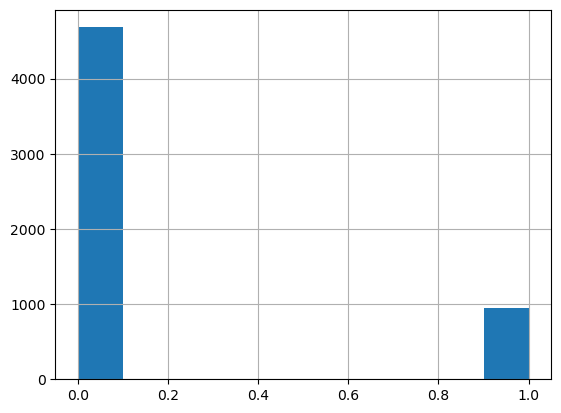

<Figure size 640x480 with 0 Axes>

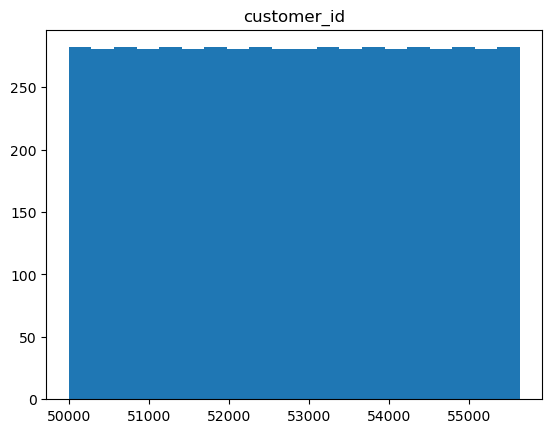

array([50001, 50002, 50003, ..., 55628, 55629, 55630])

<Figure size 640x480 with 0 Axes>

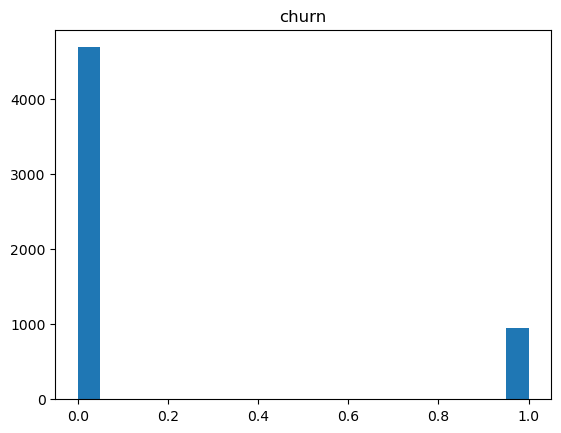

array([1, 0])

<Figure size 640x480 with 0 Axes>

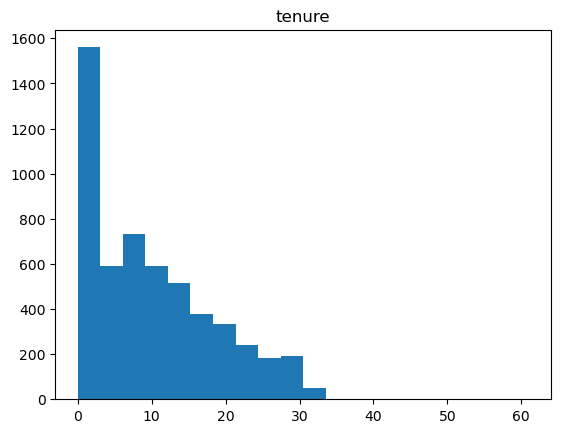

array([ 4., nan,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2.,
       30.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

<Figure size 640x480 with 0 Axes>

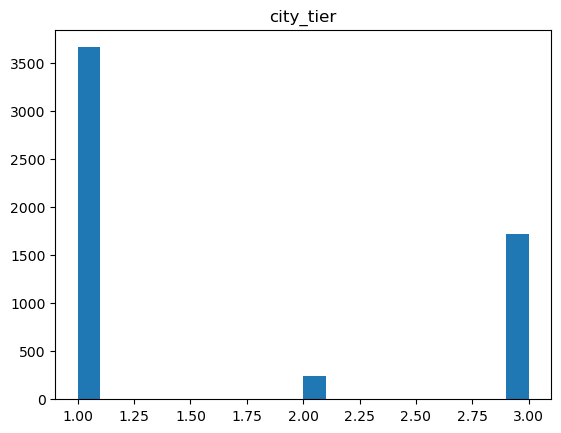

array([3, 1, 2])

<Figure size 640x480 with 0 Axes>

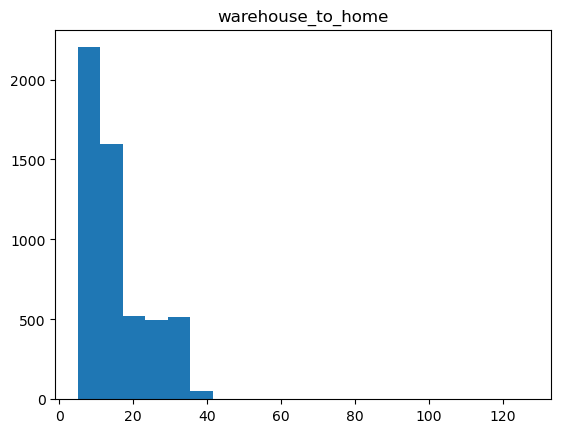

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  nan,  10.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  25.,  32.,  34.,   5.,  21., 126.,   7.,
        36., 127.])

<Figure size 640x480 with 0 Axes>

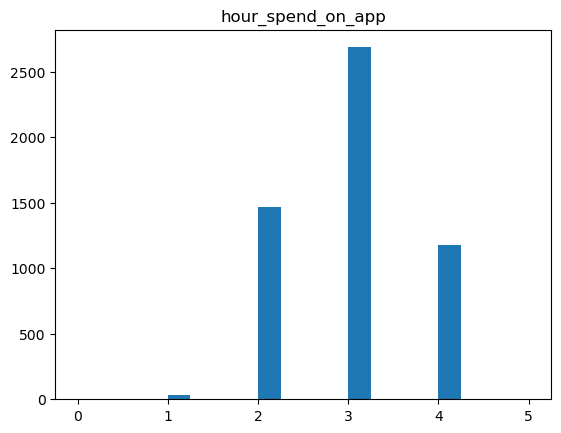

array([ 3.,  2., nan,  1.,  0.,  4.,  5.])

<Figure size 640x480 with 0 Axes>

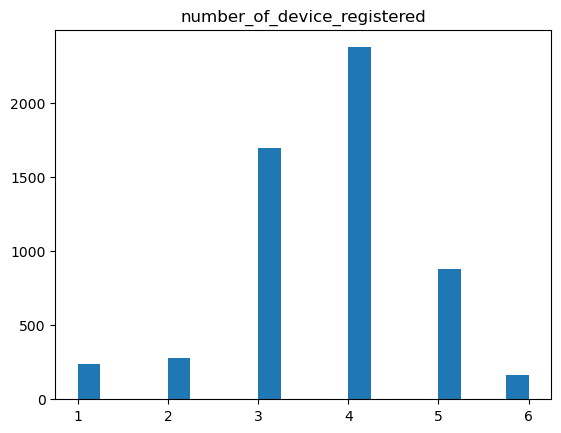

array([3, 4, 5, 2, 1, 6])

<Figure size 640x480 with 0 Axes>

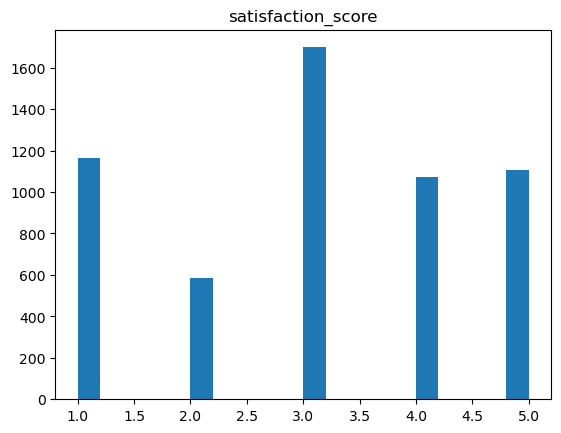

array([2, 3, 5, 4, 1])

<Figure size 640x480 with 0 Axes>

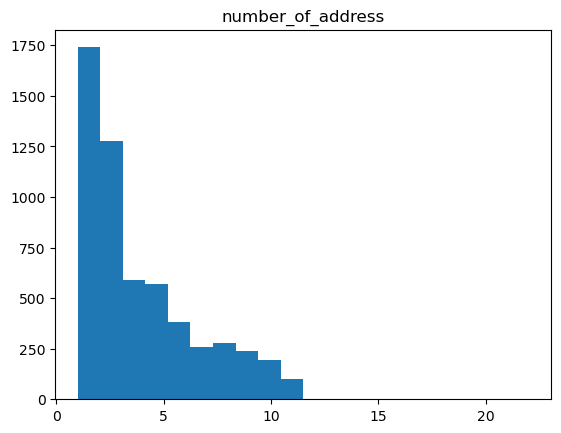

array([ 9,  7,  6,  8,  3,  2,  4, 10,  1,  5, 19, 21, 11, 20, 22])

<Figure size 640x480 with 0 Axes>

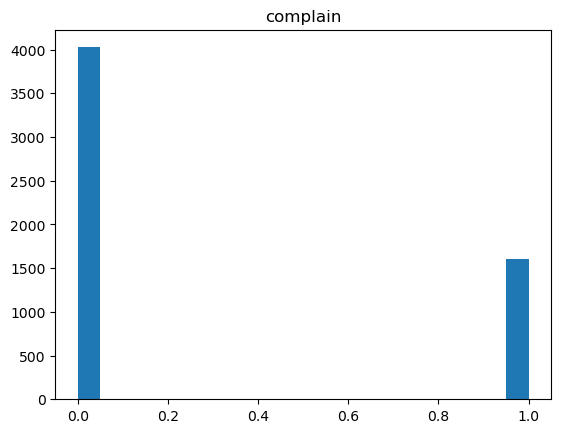

array([1, 0])

<Figure size 640x480 with 0 Axes>

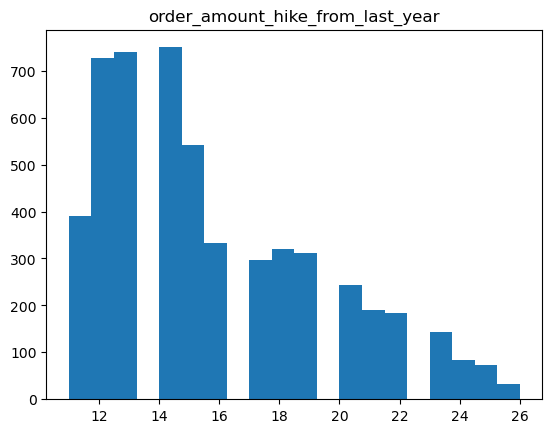

array([11., 15., 14., 23., 22., 16., 12., nan, 13., 17., 18., 24., 19.,
       20., 21., 25., 26.])

<Figure size 640x480 with 0 Axes>

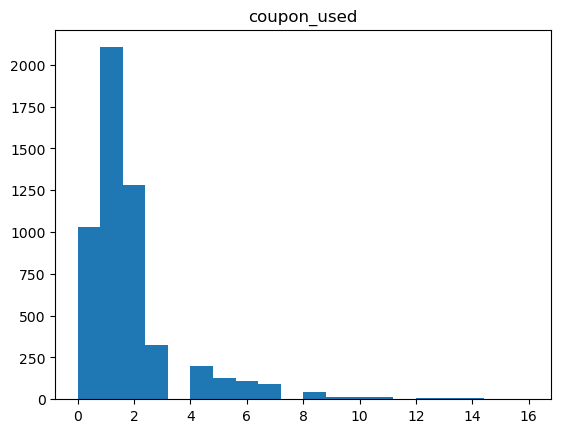

array([ 1.,  0.,  4.,  2.,  9.,  6., 11., nan,  7., 12., 10.,  5.,  3.,
       13., 15.,  8., 14., 16.])

<Figure size 640x480 with 0 Axes>

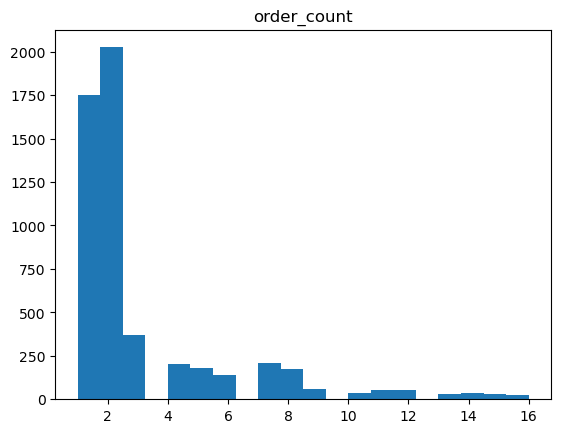

array([ 1.,  6.,  2., 15.,  4.,  7.,  3.,  9., nan, 11.,  5., 12., 10.,
        8., 13., 14., 16.])

<Figure size 640x480 with 0 Axes>

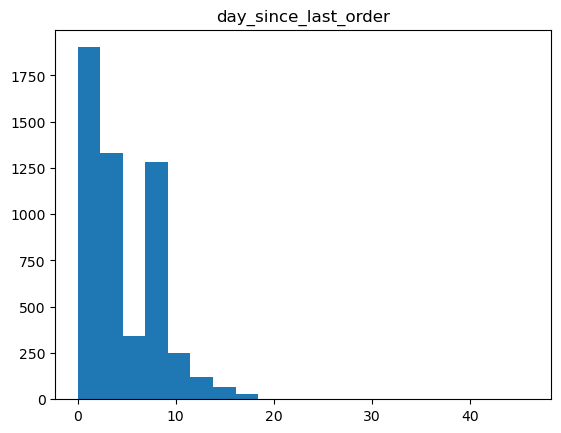

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15.,  9., 11., 10.,
       nan, 13., 12., 17., 16., 14., 30., 46., 18., 31.])

<Figure size 640x480 with 0 Axes>

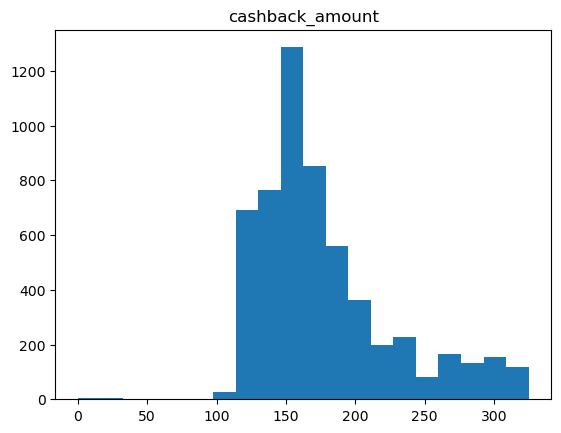

array([160, 121, 120, 134, 130, 139, 123, 127, 295, 154, 196, 129, 157,
       161, 150, 162, 203, 117, 146, 207, 142, 173, 190, 143, 133, 209,
       122, 194, 126, 299, 125, 187, 131, 111, 205, 137, 145, 128, 290,
       287, 195, 237, 300, 159, 268, 136, 144, 153, 166, 163, 168, 138,
       167, 176, 149, 204, 185, 200, 225, 236, 189, 222, 206,   0, 179,
       188, 124, 132, 292, 261, 291, 164, 165, 169, 294, 135, 152, 269,
       156, 140, 235, 218, 220, 276, 147, 158, 114, 180, 155, 260, 112,
       221, 148, 219, 271, 240, 175, 151, 293, 283, 215, 171, 183, 181,
       197, 267, 243, 232, 184, 266, 296, 280, 241, 270, 279, 191, 198,
       141, 174, 262, 216, 119, 282, 254, 177, 110, 113, 186, 212, 248,
       217, 238, 211, 284, 116, 272, 228, 202, 263, 208, 249, 178, 274,
       214, 210, 227, 298, 233, 277, 234, 275, 231, 182, 286, 278, 297,
       288, 281, 199, 273, 247, 193, 264, 192, 201, 244, 252, 170, 229,
       230, 258, 115,  12, 118, 289, 239,  56, 320, 324, 315, 31

In [6]:
data = explore_data(data)

1) A few columns contain NaN values - let's fix them and then explore the data deeper.

2) Also, it seems like we can change the data type in some of the columns.


<h3>1.3 Dealing with NaN values and data types</h3>

<h4>1.3.1 Numerical columns</h4>


In [7]:
# Function for NaN-values checking

def nan_values_checking(data):
    
    columns_with_nan_values = data.isna().sum().reset_index()
    columns_with_nan_values = columns_with_nan_values.rename(columns={"index": "column", 0: "nan_values"})
    columns_with_nan_values = columns_with_nan_values[columns_with_nan_values['nan_values'] > 0]
    columns_with_nan_values.head()
    
    for column in columns_with_nan_values['column']:
        display(column)
        display(data[column].isna().sum())
        display(data[column].unique())
        plt.figure()
        fig,ax = plt.subplots()
        ax.set_title(column)
        plt.hist(data[column], bins=20)
        plt.show()

'tenure'

264

array([ 4., nan,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2.,
       30.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

<Figure size 640x480 with 0 Axes>

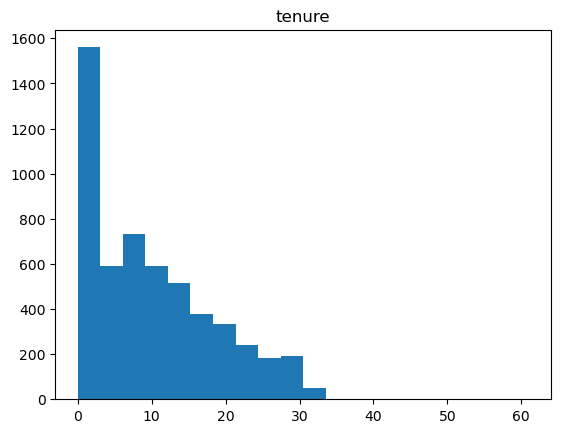

'warehouse_to_home'

251

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  nan,  10.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  25.,  32.,  34.,   5.,  21., 126.,   7.,
        36., 127.])

<Figure size 640x480 with 0 Axes>

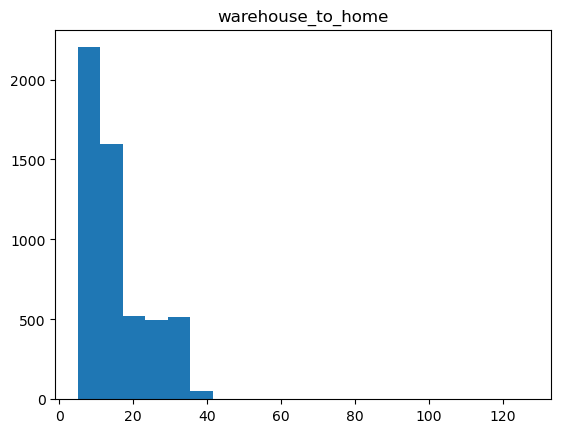

'hour_spend_on_app'

255

array([ 3.,  2., nan,  1.,  0.,  4.,  5.])

<Figure size 640x480 with 0 Axes>

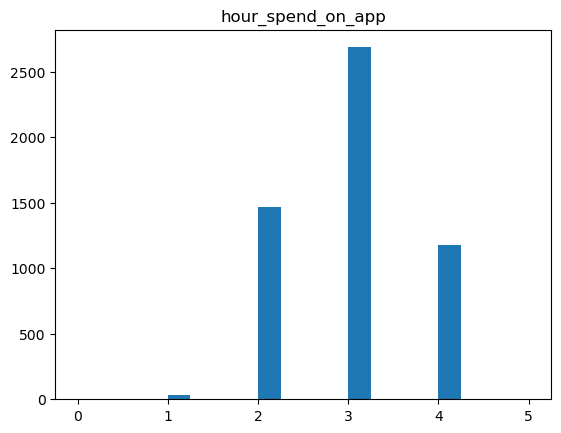

'order_amount_hike_from_last_year'

265

array([11., 15., 14., 23., 22., 16., 12., nan, 13., 17., 18., 24., 19.,
       20., 21., 25., 26.])

<Figure size 640x480 with 0 Axes>

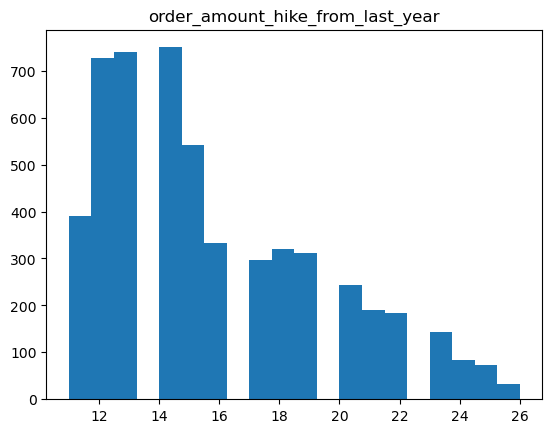

'coupon_used'

256

array([ 1.,  0.,  4.,  2.,  9.,  6., 11., nan,  7., 12., 10.,  5.,  3.,
       13., 15.,  8., 14., 16.])

<Figure size 640x480 with 0 Axes>

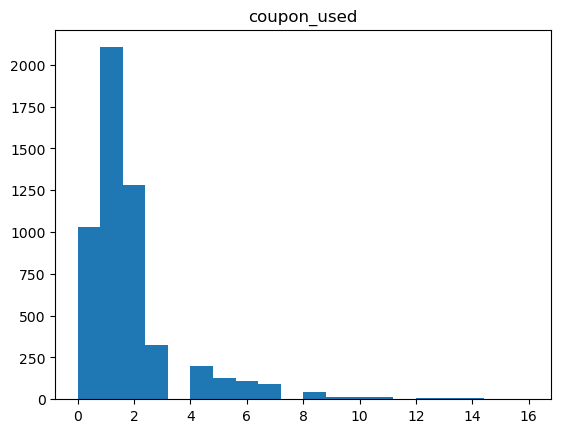

'order_count'

258

array([ 1.,  6.,  2., 15.,  4.,  7.,  3.,  9., nan, 11.,  5., 12., 10.,
        8., 13., 14., 16.])

<Figure size 640x480 with 0 Axes>

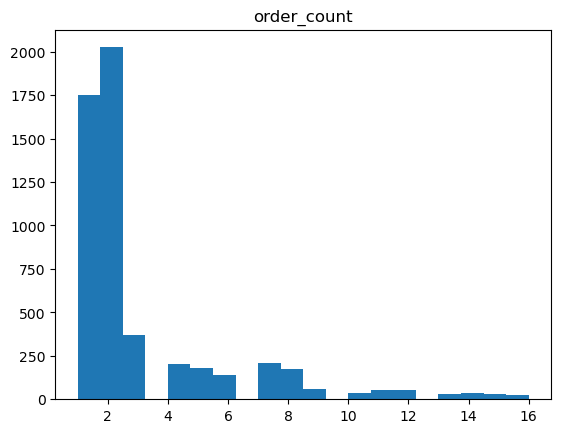

'day_since_last_order'

307

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15.,  9., 11., 10.,
       nan, 13., 12., 17., 16., 14., 30., 46., 18., 31.])

<Figure size 640x480 with 0 Axes>

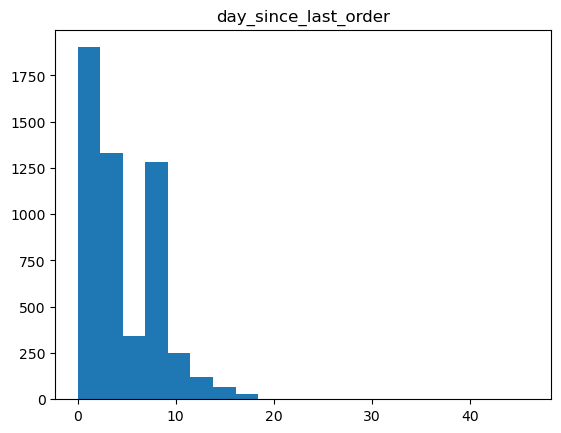

In [8]:
nan_values_checking(data)

As we can see - all NaN values in this dataset are in numerical coluns. We can replace all NaN values in these columns with the mean values, but we need to round them to the nearest whole number for it to make sense.

Also, it seems like all the float values in the columns are whole numbers, so we can change their data type to integer.

In [9]:
# Function for NaN-values filling (numerical columns)

def nan_values_filling_num(data):
    nan_values_filling_num = data.copy()

# Filling all missing values of all numeric columns with their mean value and rounding to the nearest whole number
    
    for col in nan_values_filling_num.select_dtypes(include=np.number).columns:
        nan_values_filling_num[col] = nan_values_filling_num[col].fillna(round(np.mean(nan_values_filling_num[col])))
        
    return nan_values_filling_num

In [10]:
data = nan_values_filling_num(data)

In [11]:
nan_values_checking(data)

# this function doesn't give us any result, because we filled all Nan values

In [12]:
# Function for changing data type of all the columns in the dataset from float to integer

def float_to_int(data):
    float_to_int_data = data.copy()
    
    float_to_int_data[float_to_int_data.select_dtypes(include=['float64']).columns] = float_to_int_data[float_to_int_data.select_dtypes(include=['float64']).columns].astype(int)
    
    return float_to_int_data

In [13]:
data = float_to_int(data)

<h4>1.3.1 Categorical columns</h4>

Let's explore categorical columns of this dataset.

In [14]:
categorical = data.select_dtypes(object)
categorical.head()

,preferred_login_device,preferred_payment_mode,gender,preferred_order_category,marital_status
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single


In [15]:
# Function for data exploration (categorical columns)

def explore_data_cat(data):

    categorical = data.select_dtypes(object)
    display(categorical.head())

    # Using Matplotlib to construct histograms for all categorical columns
    plt.style.context('ggplot')    
    for column_name in categorical.columns:
        plt.figure()
        fig,ax = plt.subplots()
        ax.set_title(column_name)
        plt.hist(categorical[column_name], bins=20)
        plt.xticks(rotation = 90)
        plt.show()
        display(categorical[column_name].unique())
    
    return data

,preferred_login_device,preferred_payment_mode,gender,preferred_order_category,marital_status
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single


<Figure size 640x480 with 0 Axes>

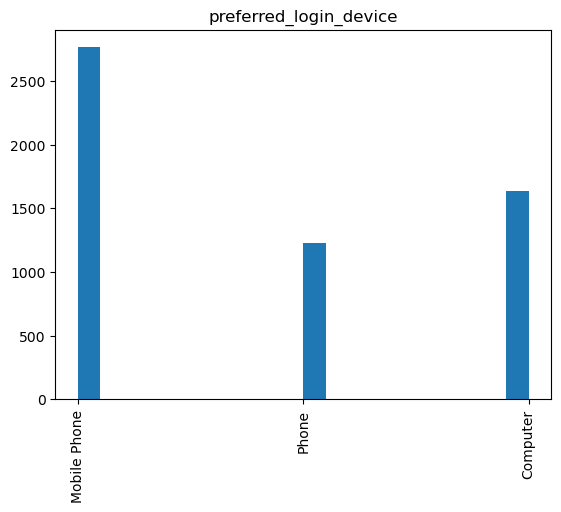

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

<Figure size 640x480 with 0 Axes>

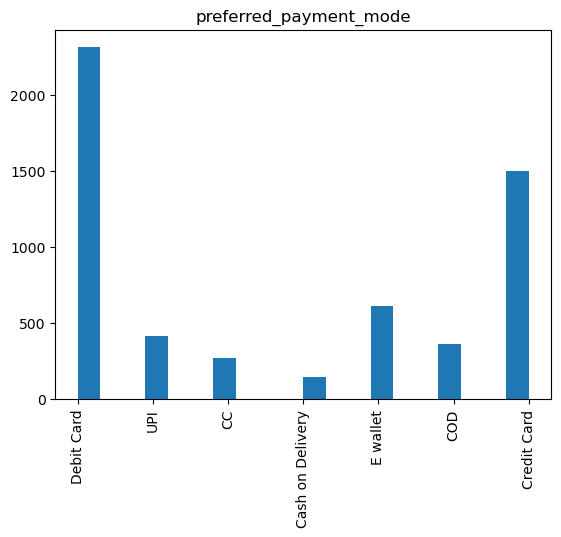

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

<Figure size 640x480 with 0 Axes>

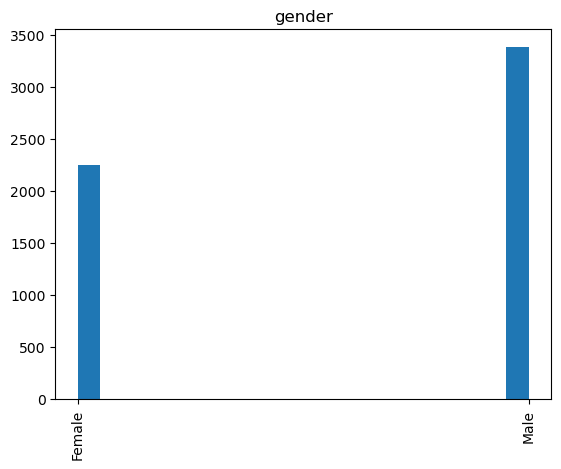

array(['Female', 'Male'], dtype=object)

<Figure size 640x480 with 0 Axes>

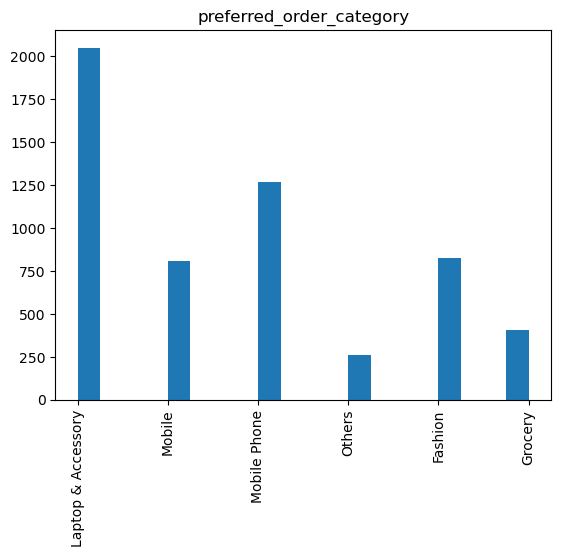

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

<Figure size 640x480 with 0 Axes>

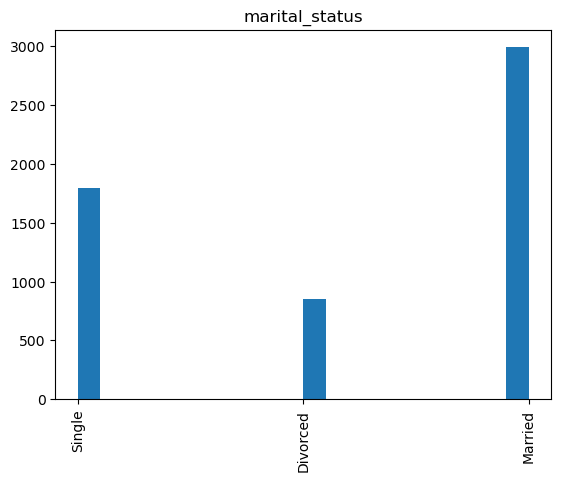

array(['Single', 'Divorced', 'Married'], dtype=object)

,customer_id,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,preferred_order_category,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_from_last_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160
1,50002,1,10,Phone,1,8,UPI,Male,3,4,Mobile,3,Single,7,1,15,0,1,0,121
2,50003,1,10,Phone,1,30,Debit Card,Male,2,4,Mobile,3,Single,6,1,14,0,1,3,120
3,50004,1,0,Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134
4,50005,1,0,Phone,1,12,CC,Male,3,3,Mobile,5,Single,3,0,11,1,1,3,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10,Computer,1,30,Credit Card,Male,3,2,Laptop & Accessory,1,Married,6,0,18,1,2,4,151
5626,55627,0,13,Mobile Phone,1,13,Credit Card,Male,3,5,Fashion,5,Married,6,0,16,1,2,5,225
5627,55628,0,1,Mobile Phone,1,11,Debit Card,Male,3,2,Laptop & Accessory,4,Married,3,1,21,1,2,4,186
5628,55629,0,23,Computer,3,9,Credit Card,Male,4,5,Laptop & Accessory,4,Married,4,0,15,2,2,9,179


In [16]:
explore_data_cat(data)

We can notice that in some of the columns there are duplicated values. We can merge them.

In [17]:
# Column 'preferred_login_device'
data.loc[data['preferred_login_device'] == 'Phone', 'preferred_login_device'] = 'Mobile Phone' 


# Column 'preferred_payment_mode'
data.loc[data['preferred_payment_mode'] == 'CC', 'preferred_payment_mode'] = 'Credit Card' 
data.loc[data['preferred_payment_mode'] == 'COD', 'preferred_payment_mode'] = 'Cash on Delivery' 


# Column 'preferred_order_category'
data.loc[data['preferred_order_category'] == 'Mobile', 'preferred_order_category'] = 'Mobile Phone'

<h3>1.4 Exploring target value</h3>

In [18]:
data['churn'].value_counts()

0    4682
1     948
Name: churn, dtype: int64

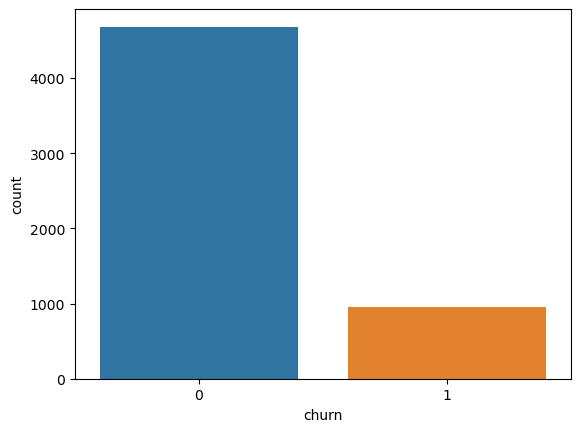

In [19]:
sns.countplot(x='churn', data=data);
plt.show()

We have a noticeable data imbalance in our target value (column 'churn'), so we will try to deal with it when we will train our model.

<h2>Part 2. Insights we can get from this dataset</h2>

In [20]:
data.head()

,customer_id,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,preferred_order_category,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_from_last_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160
1,50002,1,10,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,121
2,50003,1,10,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120
3,50004,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134
4,50005,1,0,Mobile Phone,1,12,Credit Card,Male,3,3,Mobile Phone,5,Single,3,0,11,1,1,3,130


<h3>2.1 The ratio of use of the different payment modes</h3>

In [21]:
data_payment_mode  = data['preferred_payment_mode'].value_counts().reset_index()
data_payment_mode.columns = ['payment_mode', 'count']
data_payment_mode

,payment_mode,count
0,Debit Card,2314
1,Credit Card,1774
2,E wallet,614
3,Cash on Delivery,514
4,UPI,414


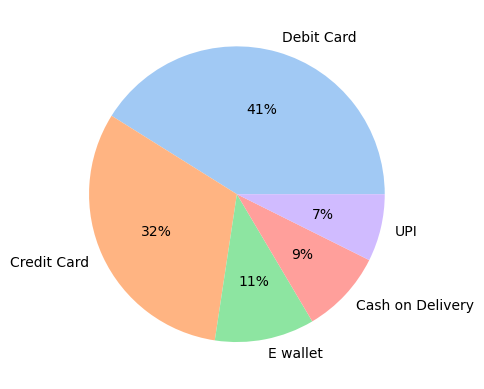

In [22]:
labels = list(data_payment_mode['payment_mode'].unique())
colors = sns.color_palette('pastel')[0:5]
plt.pie(data_payment_mode['count'], labels = data_payment_mode['payment_mode'], colors = colors, autopct='%.0f%%')
plt.show()

Debit Card is the most popular payment option (41%), after that goes Credit Card (32%) and another three options are having almost the same ratio.

<h3>2.2 The ratio of use of different login devices </h3>

In [23]:
data_login_device  = data['preferred_login_device'].value_counts().reset_index()
data_login_device.columns = ['login_device', 'count']
data_login_device

,login_device,count
0,Mobile Phone,3996
1,Computer,1634


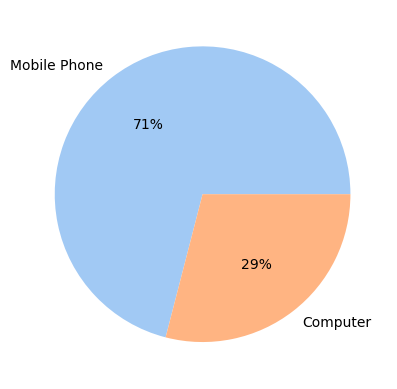

In [24]:
labels = list(data_login_device['login_device'].unique())
colors = sns.color_palette('pastel')[0:5]
plt.pie(data_login_device['count'], labels = data_login_device['login_device'], colors = colors, autopct='%.0f%%')
plt.show()

As we can see - more than 2/3 (71%) of the customers use a mobile phone to login into the service.

<h3>2.3 From which category do customers order the most? </h3>

In [25]:
data_order_category = data['preferred_order_category'].value_counts().reset_index()
data_order_category

,index,preferred_order_category
0,Mobile Phone,2080
1,Laptop & Accessory,2050
2,Fashion,826
3,Grocery,410
4,Others,264


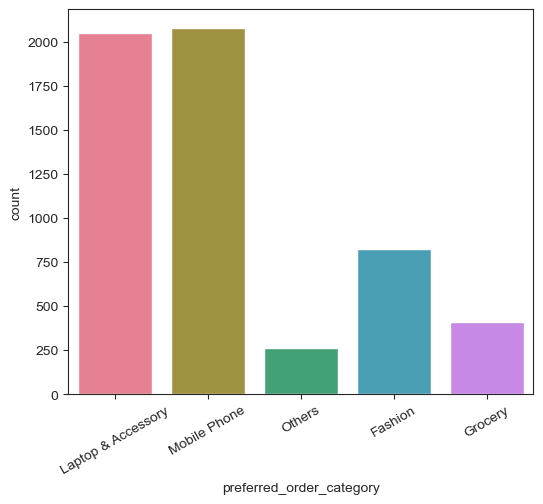

In [26]:
plt.figure(figsize = (6,5))
sns.set_style('ticks')
order_category_plot = sns.countplot(x  = 'preferred_order_category',  data = data, palette = 'husl')
order_category_plot.set_xticklabels(order_category_plot.get_xticklabels(),rotation = 30)
plt.show()

The most popular category is 'Mobile Phone', right after it - 'Laptop & Accessory', then 'Fashion' and the rest two - 'Grocery' and 'Others'.

<h3>2.4 Size of the city customers live in, typical distance from warehouse to home</h3>

In [27]:
data_city_tier = data['city_tier'].value_counts().reset_index()
data_city_tier

,index,city_tier
0,1,3666
1,3,1722
2,2,242


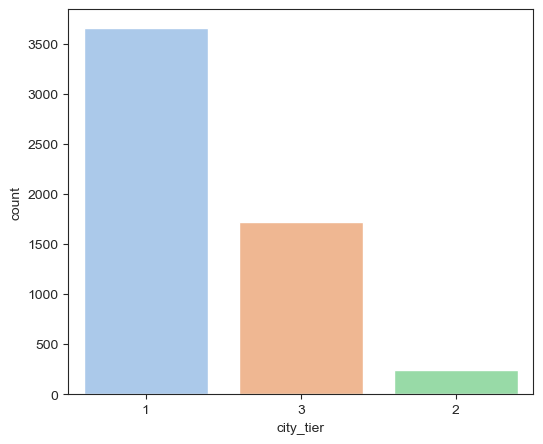

In [28]:
plt.figure(figsize = (6,5))
sns.countplot(x ='city_tier', data = data,
              palette = 'pastel',
              order = data['city_tier'].value_counts().index) 
plt.xlabel('city_tier');

Most of the customers live in the big cities, but at the same time about a quater of all the customers live in tier 3 cities.

In [29]:
data_warehouse_to_home = data['warehouse_to_home'].value_counts().reset_index()
data_warehouse_to_home.head()

,index,warehouse_to_home
0,16,573
1,9,559
2,8,444
3,7,389
4,14,299


<AxesSubplot:>

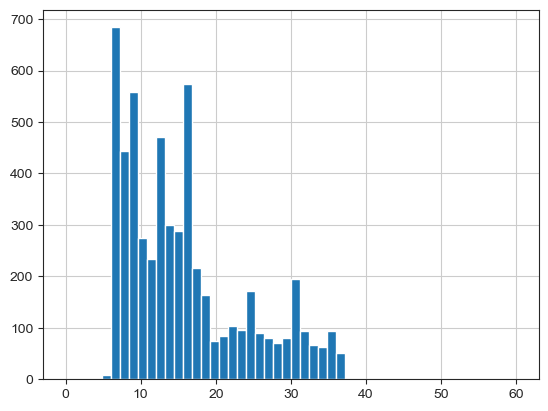

In [30]:
data['warehouse_to_home'].hist(range=(0,60), bins=50)

<AxesSubplot:xlabel='warehouse_to_home'>

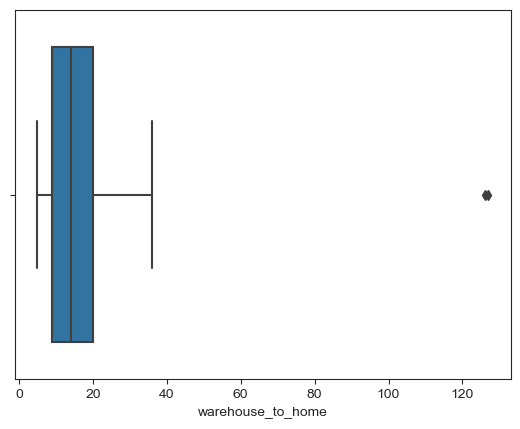

In [31]:
sns.boxplot(data=data, x="warehouse_to_home")

In [32]:
data['warehouse_to_home'].mean()

15.65595026642984

In [33]:
data['warehouse_to_home'].max()

127

Distance between warehouse and home of customer is usually around 6-16km, average distance - 15.6km. Some of the customers live in the area 16-40km and we can see a few outliers somewhere over 120km - we can delete these rows.

In [34]:
data = data[data['warehouse_to_home'] <= 40]
data['warehouse_to_home'].max()

36

<h3>2.5 How often people make orders? How many orders on average each customer make?</h3>

In [35]:
data['day_since_last_order'].mean()

4.569829424307036

<AxesSubplot:>

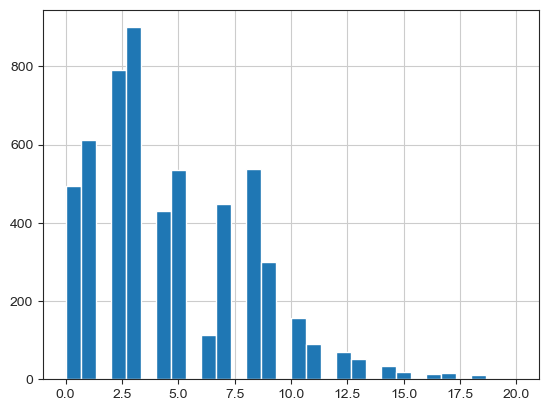

In [36]:
data['day_since_last_order'].hist(range=(0,20), bins = 30)


Most of the customers buy products again every 1-8 days. Some of them buy products once per 2 weeks. 
The most popular frequency is 3-4 days.

<AxesSubplot:>

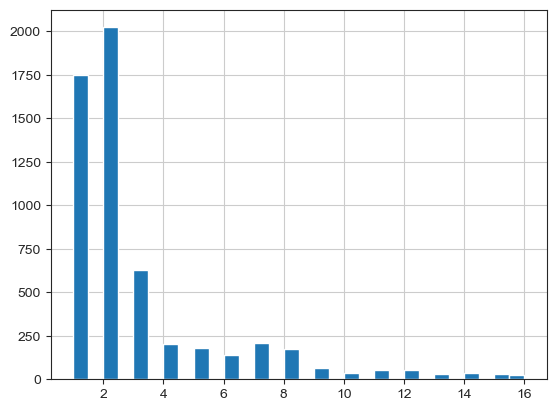

In [37]:
data['order_count'].hist(bins = 30)

Most of the customers have only 1-2 orders in total, but this service definitely has regular customers sa well (some people placed orders 4-8-15 times).

<h2>Part 4. Correlation matrix and feature extraction</h2>


Each row has it's unique customer_id, so it make sence to delete this column.

In [38]:
data = data.drop(columns=['customer_id'])
data.head()

,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,preferred_order_category,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_from_last_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160
1,1,10,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,121
2,1,10,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120
3,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134
4,1,0,Mobile Phone,1,12,Credit Card,Male,3,3,Mobile Phone,5,Single,3,0,11,1,1,3,130
